In [6]:
import numpy as np
import matplotlib.pyplot as plt
import time

<IPython.core.display.Javascript object>


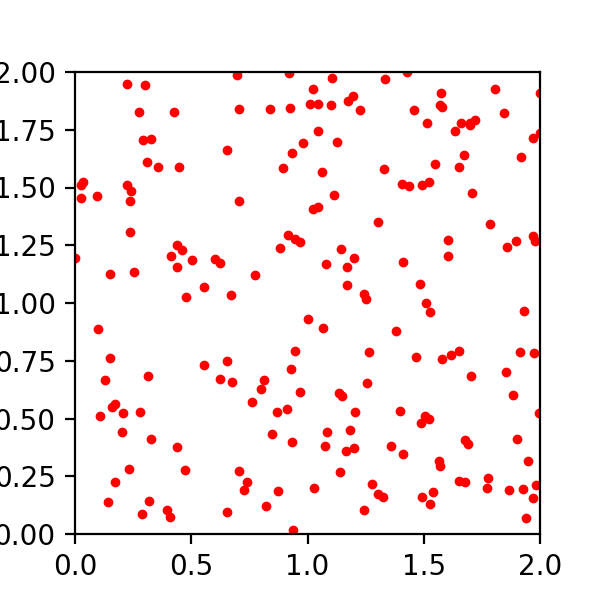

In [7]:
%matplotlib notebook

n_animals = 100
n_steps = 200
vmin = 0.01
vmax = 0.05
trap_size = 0.4 # All critters with x<this and y<this will be considred "captured"
n_speed =0.1

x = np.random.uniform(size=n_animals)
y = np.random.uniform(size=n_animals)
vx = np.random.uniform(size=n_animals, low=vmin, high=vmax)*(2*np.random.randint(size=n_animals,low=0,high=2) - 1)
vy = np.random.uniform(size=n_animals, low=vmin, high=vmax)*(2*np.random.randint(size=n_animals,low=0,high=2) - 1)
#vx = np.random.uniform(size=n_animals, )

# Capture
color = np.where(np.logical_and(x<trap_size , y<trap_size), 1, 0) # All captured are color1, all free ones are color0
n_marked = np.sum(color)

estimation = np.zeros(n_steps) # At every point in time
                                # .. we'll remember the estimation for N an ecologist could have made 

# Plotting
fig = plt.figure(figsize=(3,3))
ax = plt.subplot(111)
plt.xlim((0,1));
plt.ylim((0,1));
fig.show()
fig.canvas.draw()

for t in range(n_steps):
    # Moving elks around
    x += vx
    y += vy
    
    vx = np.where(np.logical_or(x>1,x<0), -vx , vx)
    vy = np.where(np.logical_or(y>1,y<0), -vy , vy)
    
    # Recapture
    n_recaptured_total = np.sum(np.logical_and(x<trap_size, y<trap_size))
    n_recaptured_marked = np.sum(np.logical_and(x<trap_size, y<trap_size)*color) # Condition1 AND cond2 AND color==1
    estimation[t] = (n_marked+1)/(n_recaptured_marked+1)*(n_recaptured_total)-1 # Chapman estimator
    
    ax.clear()
    plt.plot(x[color==0], y[color==0], 'k.',markersize=5);
    plt.plot(x[color==1], y[color==1], 'r.',markersize=5)
    plt.xlim((0,1));
    plt.ylim((0,1));
    fig.canvas.draw() # <--------------- The main command to make it move
    #time.sleep(0.5)
    
#plt.figure()
#plt.plot(estimation)
#plt.xlabel('Time')
#plt.ylabel('Estimate of the number of turtles')

In [28]:
class Const: # Carefree remote-eating cheaters
    def __init__(self):
        self.n_trials = 1
        self.n_animals = 200
        self.n_steps = 500
        #self.speed = 0.02
        #self.contagion_speed_essential = 0.01
        #self.contagion_speed_nonessential = 0.00
        self.arena_size = 2
        self.contagion_distance = 0.1**2 # Distance squared, to avoid sqrt() later

In [39]:
# Build the model
def model(c, show_dotses=False, n_trials=1):
    history = np.zeros((c.n_steps, n_trials))

    for i_trial in range(n_trials):        
        x = np.random.uniform(low=0, high=c.arena_size, size=c.n_animals)
        y = np.random.uniform(low=0, high=c.arena_size, size=c.n_animals)
        vx = np.zeros(c.n_animals)
        vy = np.zeros(c.n_animals)
        infected = np.zeros(c.n_animals)
        infected[0] = 1 # Patient zero
        
        stats = np.zeros(c.n_steps) # What is reported from every trial
    
        if show_dotses: # Init plots
            fig = plt.figure(figsize=(3,3))
            ax = plt.subplot(111) # No subplots; just creating axes
            plt.xlim((0,c.arena_size));
            plt.ylim((0,c.arena_size));
            fig.show()
            fig.canvas.draw()

        for t in range(c.n_steps):
            if np.sum(infected==0) == 0: # If all are infected, no need to model that
                stats[t] = 1
                continue
                
            x += vx
            y += vy
            
            vx = np.random.randn(c.n_animals)*c.speed 
            vy = np.random.randn(c.n_animals)*c.speed
            # Make them run around (keeps speed somewhat randomized)
          
            #vx = np.random.randn(0.9 * c.n_animals)*c.speed
            #vy = np.random.randn(0.1 * c.n_animals)*c.speed

    
            x = np.maximum(0,np.minimum(x, c.arena_size)) # Keep them in enclosure
            y = np.maximum(0,np.minimum(y, c.arena_size))
            
            for i_animal in range(c.n_animals):
                if infected[i_animal]==1:
                    d = np.square(x-x[i_animal]) + np.square(y-y[i_animal])
                    victims = np.argwhere(d < c.contagion_distance)
                    infected[victims] = 1
                
            stats[t] = np.sum(infected)/c.n_animals
            
            if show_dotses: # Actual animation
                ax.clear()
                plt.plot(x[infected==0], y[infected==0], 'k.', markersize=5);
                plt.plot(x[infected==1], y[infected==1], 'r.', markersize=5);
                plt.xlim((0,c.arena_size));
                plt.ylim((0,c.arena_size));
                fig.canvas.draw() # Redraws the canvas (key secret command to animate things)
            else:
                if t % 100 == 0:
                    print('.',end='')
        # --- Time loop is over

        history[:,i_trial] = stats
    return np.mean(history, axis=1)


<IPython.core.display.Javascript object>


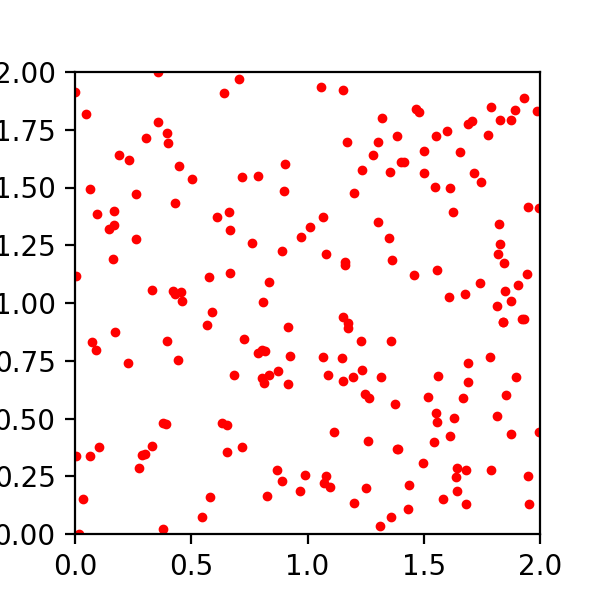

In [40]:
c = Const()
c.speed = 0.02
curve = model(c, show_dotses=True, n_trials=1);
#plt.figure(figsize=(3,3))
#plt.plot(np.diff(curve))